In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import math
from scipy.io import loadmat

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# raw_data_path = '/content/gdrive/MyDrive/CC_Thesis/data/Data_X35_Y0_Z200_#5/MData_35mm_0mm_200mm662keV.txt'
raw_data_path = '/content/gdrive/MyDrive/CC_Thesis/data/Data_X100_Y100_#3/x100_y100_raw_data.csv'
first_interaction_path = '/content/gdrive/MyDrive/CC_Thesis/data/Data_X35_Y0_Z200_#5/first_interaction_#5'
second_interaction_path = '/content/gdrive/MyDrive/CC_Thesis/data/Data_X35_Y0_Z200_#5/second_interaction_#5'

In [95]:
# -- Use this code to load .mat file
# Path to your .mat file
file_path = '/content/gdrive/MyDrive/CC_Thesis/data/Data_X100_Y100_#3/MData13.mat'
file_path_2 = '/content/gdrive/MyDrive/CC_Thesis/data/Data_X100_Y100_#3/MData17.mat'


# Load the .mat file
mat_data = loadmat(file_path)
mat_data_2 = loadmat(file_path_2)


# Print all variable names
print("Variables in the .mat file_1:")
for key in mat_data:
    if not key.startswith('__'):  # Exclude metadata
        print(key)

print()

print("Variables in the .mat file_2:")
for key in mat_data_2:
    if not key.startswith('__'):  # Exclude metadata
        print(key)

# Extract the desired array (assuming the array is named 'data')
data = mat_data['M']
data_2 = mat_data_2['M']

# Convert to numpy array if needed (it should already be a numpy array)
numpy_array = np.array(data)
numpy_array_2 = np.array(data_2)

raw_data = []
raw_data_2 = []

# Move the fifth column between the first and second columns
# Create a new array with the desired column order
raw_data = np.column_stack((numpy_array[:, 0], numpy_array[:, 4], numpy_array[:, 1], numpy_array[:, 2], numpy_array[:, 3]))
raw_data_2 = np.column_stack((numpy_array_2[:, 0], numpy_array_2[:, 4], numpy_array_2[:, 1], numpy_array_2[:, 2], numpy_array_2[:, 3]))

# Add the length of raw_data to the first column of raw_data_2
raw_data_2[:, 0] += len(raw_data)

# Concatenate raw_data and modified raw_data_2
combined_data = np.concatenate((raw_data, raw_data_2), axis=0)

raw_data = combined_data

# Prints
print("Shape of the array:", raw_data.shape)
print(raw_data.shape)
print("Here are the first 10 rows of the data:")
print(raw_data[0:9])


Variables in the .mat file_1:
M

Variables in the .mat file_2:
M
Shape of the array: (335393, 5)
(335393, 5)
Here are the first 10 rows of the data:
[[  3.      182.778     7.51131 -17.2454   24.904  ]
 [  3.      479.222     4.34673 -10.4257  -22.728  ]
 [ 11.      383.773    16.9274   -3.15407  24.7216 ]
 [ 11.      278.227    21.332    -3.87796  23.4389 ]
 [ 17.      249.802   -10.5227    8.54831  23.0091 ]
 [ 17.       93.021   -12.0343    7.49553  23.2269 ]
 [ 17.      319.177   -13.0037   -3.39059  23.3316 ]
 [ 19.      459.538     4.37855  24.1646   20.6361 ]
 [ 19.       14.048     5.73164  24.5203   21.1075 ]]


In [96]:
# Save the raw_data array into a text file
np.savetxt('raw_data.txt', raw_data, delimiter=',', fmt='%f')

print("raw_data has been saved to raw_data.txt")

raw_data has been saved to raw_data.txt


In [ ]:
# Read the CSV file into a numpy array
raw_data = np.loadtxt(raw_data_path, delimiter=',')

# Print the shape of the array to verify
print(raw_data.shape)
print(raw_data)

(203198, 5)
[[ 4.20000e+01  4.07348e+02 -6.83240e-02  1.60782e+01  2.18988e+01]
 [ 4.20000e+01  3.20960e+01  2.43863e+00  1.73730e+01  2.07663e+01]
 [ 4.20000e+01  2.22556e+02  2.53010e+00  1.75939e+01  2.07653e+01]
 ...
 [ 4.99991e+05  2.31639e+02 -1.21822e+01  2.96966e+00  2.46714e+01]
 [ 4.99995e+05  8.48590e+01 -2.37070e+01 -1.48572e+01  2.22266e+01]
 [ 4.99996e+05  3.76131e+02  2.25324e+00  2.21184e+01  1.63997e+01]]


In [ ]:
# Read the data from the text file
with open(raw_data_path, 'r') as f:
    raw_data = f.read()

# Convert the data into a 2D array
raw_data = raw_data.strip().split('\n')
raw_data = [list(map(float, row.split('\t'))) for row in raw_data]
raw_data = np.array(raw_data)
#raw_data[:,1] *= 1000
#raw_data = raw_data[:299999,:]

print('raw date shape',raw_data.shape)
print('First 10 rows of the loaded data:')
print(raw_data[0:9])
print('Last 10 rows of the loaded data:')
print(raw_data[-10:])

raw date shape (1053000, 5)
First 10 rows of the loaded data:
[[ 6.00000e+00  2.87694e+02  2.09873e+01 -1.33942e-01  1.57157e+01]
 [ 6.00000e+00  3.74306e+02  2.14069e+01 -7.91162e-01  1.53288e+01]
 [ 7.00000e+00  4.23197e+02  1.59873e+01 -2.98525e+00 -2.09398e+01]
 [ 1.30000e+01  4.69169e+02 -4.62216e+00  3.12458e+00  2.12611e+01]
 [ 1.30000e+01  1.92831e+02 -4.63717e+00  3.20212e+00  2.14500e+01]
 [ 1.60000e+01  2.88660e+02  1.93869e+01  2.34056e+01  2.22846e+01]
 [ 1.70000e+01  9.38060e+01 -8.13187e-01 -1.92897e+01  2.36703e+01]
 [ 1.80000e+01  6.56380e+01 -3.32475e+00 -2.39554e+01  9.39061e+00]
 [ 1.80000e+01  7.52010e+01 -5.00380e+00 -2.29218e+01  5.48337e+00]]
Last 10 rows of the loaded data:
[[ 1.999991e+06  1.679340e+02  1.612320e+01  1.489400e+01  2.369460e+01]
 [ 1.999991e+06  4.940660e+02  1.698200e+01  1.492790e+01  2.252450e+01]
 [ 1.999991e+06  4.343900e+02 -2.083650e+01 -1.220020e+01 -1.847690e+01]
 [ 1.999991e+06  2.276100e+02 -2.327510e+01 -1.346510e+01 -1.595920e+01]


In [68]:
raw_data.shape

(335393, 5)

In [ ]:
# prompt: 'raw_data' is a 5 column np array, find the first row where the first column has value greater then 999999 and from this row until the end - delete every row

idx = np.where(raw_data[:,0] > 999999)[0][0]
raw_data = np.delete(raw_data, np.arange(idx, len(raw_data)), axis=0)


In [ ]:
raw_data.shape

(525963, 5)

In [22]:
raw_data[-10:,]

array([[ 1.066951e+06,  9.115700e+01,  1.672590e+01,  6.539000e+00,
         2.343100e+01],
       [ 1.066952e+06,  2.945830e+02, -9.358860e+00,  1.283190e+01,
         2.329390e+01],
       [ 1.066952e+06,  1.174000e+02, -1.459640e+01,  1.285050e+01,
         2.395790e+01],
       [ 1.066952e+06,  2.500170e+02, -1.638360e+01,  1.778910e+01,
         2.422960e+01],
       [ 1.066956e+06,  6.620000e+02,  3.158000e+00,  1.300060e+01,
        -2.273780e+01],
       [ 1.066960e+06,  4.000150e+02,  5.389580e+00, -1.448860e+01,
         2.021600e+01],
       [ 1.066960e+06,  2.619850e+02,  1.269530e+01, -2.087850e+01,
         2.276670e+01],
       [ 1.066970e+06,  3.756350e+02,  1.398850e+01, -3.315090e+00,
        -2.237830e+01],
       [ 1.066977e+06,  2.011240e+02, -6.630510e+00, -1.149370e+00,
        -2.363630e+01],
       [ 1.066987e+06,  2.482700e+02,  8.229180e+00,  1.037110e+01,
         2.341500e+01]])

In [97]:
# Define a function to format a number as a string with full precision
def format_number(x):
    return "{:.6f}".format(x)

# Iterate over the last 10 rows of the raw_data array
for row in raw_data[-10:]:
    formatted_row = [format_number(num) for num in row]
    print(" ".join(formatted_row))


1066951.000000 91.157000 16.725900 6.539000 23.431000
1066952.000000 294.583000 -9.358860 12.831900 23.293900
1066952.000000 117.400000 -14.596400 12.850500 23.957900
1066952.000000 250.017000 -16.383600 17.789100 24.229600
1066956.000000 662.000000 3.158000 13.000600 -22.737800
1066960.000000 400.015000 5.389580 -14.488600 20.216000
1066960.000000 261.985000 12.695300 -20.878500 22.766700
1066970.000000 375.635000 13.988500 -3.315090 -22.378300
1066977.000000 201.124000 -6.630510 -1.149370 -23.636300
1066987.000000 248.270000 8.229180 10.371100 23.415000


In [80]:
raw_data[:10,:]

array([[  3.     , 182.778  ,   7.51131, -17.2454 ,  24.904  ],
       [  3.     , 479.222  ,   4.34673, -10.4257 , -22.728  ],
       [ 11.     , 383.773  ,  16.9274 ,  -3.15407,  24.7216 ],
       [ 11.     , 278.227  ,  21.332  ,  -3.87796,  23.4389 ],
       [ 17.     , 249.802  , -10.5227 ,   8.54831,  23.0091 ],
       [ 17.     ,  93.021  , -12.0343 ,   7.49553,  23.2269 ],
       [ 17.     , 319.177  , -13.0037 ,  -3.39059,  23.3316 ],
       [ 19.     , 459.538  ,   4.37855,  24.1646 ,  20.6361 ],
       [ 19.     ,  14.048  ,   5.73164,  24.5203 ,  21.1075 ],
       [ 19.     , 188.414  ,   6.2639 ,  24.2941 ,  21.4119 ]])

In [79]:
raw_data[-10:,:]

array([[ 1.066951e+06,  9.115700e+01,  1.672590e+01,  6.539000e+00,
         2.343100e+01],
       [ 1.066952e+06,  2.945830e+02, -9.358860e+00,  1.283190e+01,
         2.329390e+01],
       [ 1.066952e+06,  1.174000e+02, -1.459640e+01,  1.285050e+01,
         2.395790e+01],
       [ 1.066952e+06,  2.500170e+02, -1.638360e+01,  1.778910e+01,
         2.422960e+01],
       [ 1.066956e+06,  6.620000e+02,  3.158000e+00,  1.300060e+01,
        -2.273780e+01],
       [ 1.066960e+06,  4.000150e+02,  5.389580e+00, -1.448860e+01,
         2.021600e+01],
       [ 1.066960e+06,  2.619850e+02,  1.269530e+01, -2.087850e+01,
         2.276670e+01],
       [ 1.066970e+06,  3.756350e+02,  1.398850e+01, -3.315090e+00,
        -2.237830e+01],
       [ 1.066977e+06,  2.011240e+02, -6.630510e+00, -1.149370e+00,
        -2.363630e+01],
       [ 1.066987e+06,  2.482700e+02,  8.229180e+00,  1.037110e+01,
         2.341500e+01]])

In [71]:
raw_data.shape

(335393, 5)

In [98]:
# Find the indices where the serial number changes
indices = np.where(raw_data[:-1, 0] != raw_data[1:, 0])[0] + 1
print('The row indices of the loaded data where the serial number changes, including the first and last indices:')
# Add element to beginning of array
indices = np.insert(indices, 0, 0)
# Add element to end of array
indices = np.append(indices, len(raw_data)-1)
print(indices)

The row indices of the loaded data where the serial number changes, including the first and last indices:
[     0      2      4 ... 335391 335392 335392]


In [99]:
indices = indices[0:len(indices)-1]
print(indices)

[     0      2      4 ... 335390 335391 335392]


In [83]:
# Create new array of EnergyPerPhoton
EnergyPerPhoton = np.zeros((len(indices)-1, 2))
# Loop through indices
for i in range(len(indices)-1):
    # Sum the values in the second column
    EnergyPerPhoton[i, 1] = np.sum(raw_data[indices[i]:indices[i+1], 1])
    # Copy the serial number
    EnergyPerPhoton[i, 0] = raw_data[indices[i], 0]
#EnergyPerPhoton[i, 1] = raw_data[indices[i], 1] #tfira
print('The following array contains photons that made at least single interaction inside the compton camera and the total energy they transfered to the camera:')
print(EnergyPerPhoton)

The following array contains photons that made at least single interaction inside the compton camera and the total energy they transfered to the camera:
[[3.000000e+00 6.620000e+02]
 [1.100000e+01 6.620000e+02]
 [1.700000e+01 6.620000e+02]
 ...
 [1.066960e+06 6.620000e+02]
 [1.066970e+06 3.756350e+02]
 [1.066977e+06 2.011240e+02]]


In [84]:
# prompt: find in which rows of 'EnergyPerPhoton', the second column contains value greater then 662.1 and how many like this there are, and out of how many in total

# Find the rows where the second column is greater than 662.1
rows_with_high_energy = np.where(EnergyPerPhoton[:, 1] > 662.1)[0]

# Print the number of rows with high energy
print(f"There are {len(rows_with_high_energy)} rows with energy greater than 662.1 out of a total of {len(EnergyPerPhoton)} rows.")

# Print the rows with high energy
print(rows_with_high_energy)


There are 0 rows with energy greater than 662.1 out of a total of 228311 rows.
[]


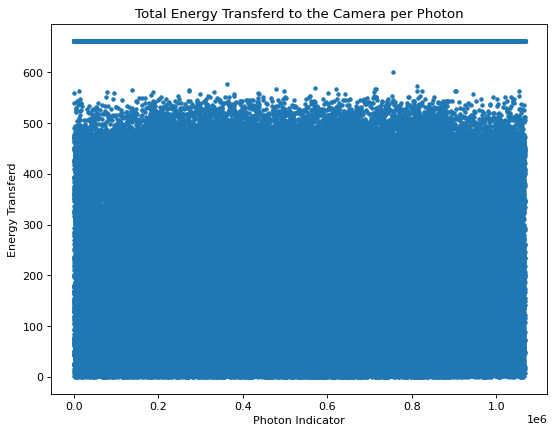

In [85]:
# Plot EnergyPerPhoton
plt.figure(figsize=(8, 6), dpi=80)
plt.xlabel("Photon Indicator")
plt.ylabel("Energy Transferd")
plt.title("Total Energy Transferd to the Camera per Photon")
plt.plot(EnergyPerPhoton[:, 0], EnergyPerPhoton[:, 1], '.')
plt.show()

In [86]:
EnergyPerPhoton[np.where(EnergyPerPhoton[:, 1]>663), 0]

array([], shape=(1, 0), dtype=float64)

In [87]:
# Print the number of elements in EnergyPerPhoton
print('There is', len(EnergyPerPhoton[:,1]), 'total photons that made at least single interaction inside the compton camera')

# Print the number of elements in EnergyPerPhoton that are greater than 600KeV
print('There is', len(EnergyPerPhoton[EnergyPerPhoton[:,1] > 600]) ,'total photons that totally absorbed inside the compton camera')


# Calculate the percentage of elements in EnergyPerPhoton greater than 600KeV
percentage = (len(EnergyPerPhoton[EnergyPerPhoton[:, 1] > 600])) / len(EnergyPerPhoton[:, 1])
print('which is',round(percentage*100,3), '% out of the total photons interacted with the compton camera')

There is 228311 total photons that made at least single interaction inside the compton camera
There is 81233 total photons that totally absorbed inside the compton camera
which is 35.58 % out of the total photons interacted with the compton camera


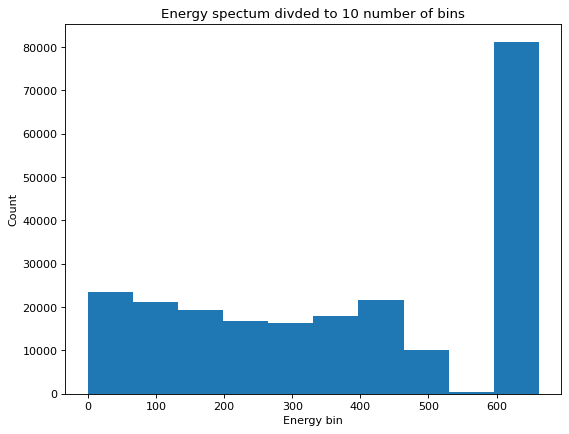

In [88]:
# Plot histogram
plt.figure(figsize=(8, 6), dpi=80)
binsnum = 10
plt.hist(EnergyPerPhoton[:2000000, 1],bins=binsnum)
plt.title('Energy spectum divded to {} number of bins' .format(binsnum))
plt.xlabel('Energy bin')
plt.ylabel('Count')
plt.show()

In [ ]:
indices[0:6]

array([0, 3, 4, 5, 6, 7])

In [89]:
raw_data.shape

(335393, 5)

In [100]:
# Check if the first column contains any non-integer numbers
first_column = raw_data[:, 0]
non_integers = first_column[~np.isclose(first_column, first_column.astype(int))]

# Print results
if non_integers.size > 0:
    print("The first column contains non-integer numbers:")
    print(non_integers)
else:
    print("All numbers in the first column are integers.")

All numbers in the first column are integers.


In [116]:
ComptonData = np.zeros((len(raw_data), 5))

In [117]:
ComptonData

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [118]:
# The following code filters out the events that their photon made only
# single interaction with the CC
ComptonData = np.zeros((len(raw_data), 5))
filteredData = np.zeros((len(raw_data), 5))
x=0 #filteredData index
y=0 #ComptonData index
for i in range(len(indices)-2):
      if (indices[i] < 10):
        print(x,y)
      index1 = indices[i]          # start index of the window
      index2 = indices[i+1]-1      # finish index of the window

      if index2 - index1 == 0:
          filteredData[x] = (raw_data[index1].reshape(1,-1))
          x = x+1
      else:
          ComptonData[y] = (raw_data[index1].reshape(1,-1))
          y = y+1
          ComptonData[y] = (raw_data[index1+1].reshape(1,-1))
          y = y+1

0 0
0 2
0 4
0 6


In [119]:
# Check if the first column contains any non-integer numbers
first_column = ComptonData[:, 0]
non_integers = first_column[~np.isclose(first_column, first_column.astype(int))]

# Print results
if non_integers.size > 0:
    print("The first column contains non-integer numbers:")
    print(non_integers)
else:
    print("All numbers in the first column are integers.")

All numbers in the first column are integers.


In [104]:
# Save the raw_data array into a text file
np.savetxt('ComptonData.txt', ComptonData, delimiter=',', fmt='%f')

print("raw_data has been saved to ComptonData.txt")

raw_data has been saved to ComptonData.txt


In [120]:
print('Shape before cut is', ComptonData.shape)
ComptonData = ComptonData[~np.all(ComptonData == 0, axis=1)]
print('Shape after cut is', ComptonData.shape)
print('Note that this shape must be even as is represents compton events')
numberOfComptonEvents = (ComptonData.shape[0])//2
print('There are', numberOfComptonEvents,'Compton events in total')

Shape before cut is (335393, 5)
Shape after cut is (152398, 5)
Note that this shape must be even as is represents compton events
There are 76199 Compton events in total


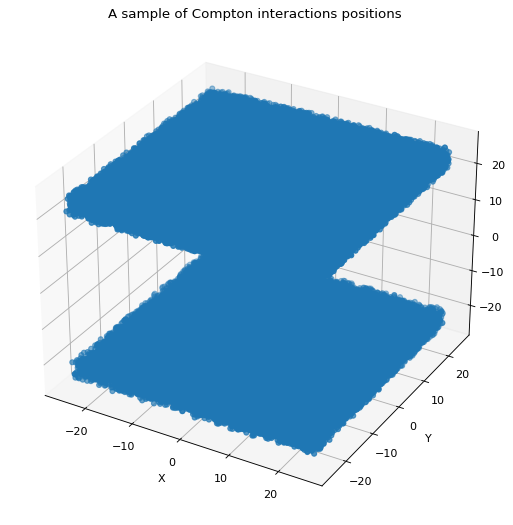

In [121]:
# Plot the data
fig = plt.figure(figsize=(8, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')
elements_to_show = 5000
ax.scatter(ComptonData[:-elements_to_show,2], ComptonData[:-elements_to_show,3], ComptonData[:-elements_to_show,4])

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('A sample of Compton interactions positions')
plt.show()

In [122]:
first_int  = ComptonData[0::2]
second_int = ComptonData[1::2]
print(ComptonData)
print()
print(first_int)
print()
print(second_int)

[[ 3.000000e+00  1.827780e+02  7.511310e+00 -1.724540e+01  2.490400e+01]
 [ 3.000000e+00  4.792220e+02  4.346730e+00 -1.042570e+01 -2.272800e+01]
 [ 1.100000e+01  3.837730e+02  1.692740e+01 -3.154070e+00  2.472160e+01]
 ...
 [ 1.066952e+06  1.174000e+02 -1.459640e+01  1.285050e+01  2.395790e+01]
 [ 1.066960e+06  4.000150e+02  5.389580e+00 -1.448860e+01  2.021600e+01]
 [ 1.066960e+06  2.619850e+02  1.269530e+01 -2.087850e+01  2.276670e+01]]

[[ 3.000000e+00  1.827780e+02  7.511310e+00 -1.724540e+01  2.490400e+01]
 [ 1.100000e+01  3.837730e+02  1.692740e+01 -3.154070e+00  2.472160e+01]
 [ 1.700000e+01  2.498020e+02 -1.052270e+01  8.548310e+00  2.300910e+01]
 ...
 [ 1.066951e+06  3.191740e+02  1.630380e+01  8.112070e+00  2.337380e+01]
 [ 1.066952e+06  2.945830e+02 -9.358860e+00  1.283190e+01  2.329390e+01]
 [ 1.066960e+06  4.000150e+02  5.389580e+00 -1.448860e+01  2.021600e+01]]

[[ 3.000000e+00  4.792220e+02  4.346730e+00 -1.042570e+01 -2.272800e+01]
 [ 1.100000e+01  2.782270e+02  2.1332

In [123]:
# The following code filters out the events and their photon-related events that
# appear more than once in the same position (x,y,z)


# Create a boolean mask of True for elements that match and False for those that don't
#mask = np.where(first_int[:, [0, 2, 3, 4]] == second_int[:, [0, 2, 3, 4]])
mask = np.all(first_int[:, [0, 2, 3, 4]] == second_int[:, [0, 2, 3, 4]], axis=1)
# Find the indices of the rows to be deleted
rows_to_delete = np.where(mask==1)[0]

# Delete the rows from first_int
first_int = np.delete(first_int, rows_to_delete, axis=0)
second_int = np.delete(second_int, rows_to_delete, axis=0)
print('There is', np.where(mask)[0].shape[0], 'events that appears in the same location in the first and second interactions')
print('They are filtered and now first_int and second_int does not contain "same coordinates events"')

There is 0 events that appears in the same location in the first and second interactions
They are filtered and now first_int and second_int does not contain "same coordinates events"


In [124]:
# Eliminate events with less then 10kev
# Print the old arrays size
print(first_int.shape)
print(second_int.shape)
print()
# Find rows with zero in the second column
rows_to_delete = np.any([first_int[:, 1] < 10, second_int[:, 1] < 10], axis=0)

# Delete rows from both arrays
first_int = np.delete(first_int, np.where(rows_to_delete), axis=0)
second_int = np.delete(second_int, np.where(rows_to_delete), axis=0)


# Print the updated arrays size
print(first_int.shape)
print(second_int.shape)

(76199, 5)
(76199, 5)

(72601, 5)
(72601, 5)


In [125]:
# Save the 2D array as a NumPy binary file
np.save('/content/gdrive/MyDrive/CC_Thesis/data/Data_X100_Y100_#3/first_interaction_#3V2', first_int)
np.save('/content/gdrive/MyDrive/CC_Thesis/data/Data_X100_Y100_#3/second_interaction_#3V2', second_int)

In [ ]:
first_int  = np.load('/content/gdrive/MyDrive/CC_Thesis/data/Data_X100_Y100_#3/first_interaction_#3.npy')
second_int = np.load('/content/gdrive/MyDrive/CC_Thesis/data/Data_X100_Y100_#3/second_interaction_#3.npy')

In [ ]:
print(first_int)
print()
print(second_int)
print()
print(first_int.shape)
print()
print(second_int.shape)

[[ 4.20000e+01  4.07348e+02 -6.83240e-02  1.60782e+01  2.18988e+01]
 [ 6.80000e+01  3.82960e+02 -2.48963e+01 -1.30054e+01  1.96598e+01]
 [ 8.00000e+01  1.84040e+02  2.35677e+01  2.11053e+01  1.80064e+01]
 ...
 [ 4.99960e+05  2.92686e+02  2.11829e+01  1.09892e+01 -8.90715e+00]
 [ 4.99980e+05  1.91270e+01  2.11836e+01  2.38227e+01 -4.48778e+00]
 [ 4.99991e+05  4.30361e+02 -1.23147e+01  2.39413e+00  2.47379e+01]]

[[ 4.20000e+01  3.20960e+01  2.43863e+00  1.73730e+01  2.07663e+01]
 [ 6.80000e+01  2.24220e+01 -2.33496e+01 -1.15499e+01  1.78980e+01]
 [ 8.00000e+01  1.16689e+02  2.47541e+01  2.17468e+01  1.28875e+01]
 ...
 [ 4.99960e+05  7.06830e+01  2.22285e+01  1.59406e+01 -1.49241e+01]
 [ 4.99980e+05  6.42873e+02  1.79473e+01  2.07011e+01 -9.75518e+00]
 [ 4.99991e+05  2.31639e+02 -1.21822e+01  2.96966e+00  2.46714e+01]]

(51472, 5)

(51472, 5)


In [ ]:
first_int = first_int[:-1, :]

print("after")
print(first_int.shape)
print()
print(second_int.shape)



after
(47251, 5)

(47251, 5)


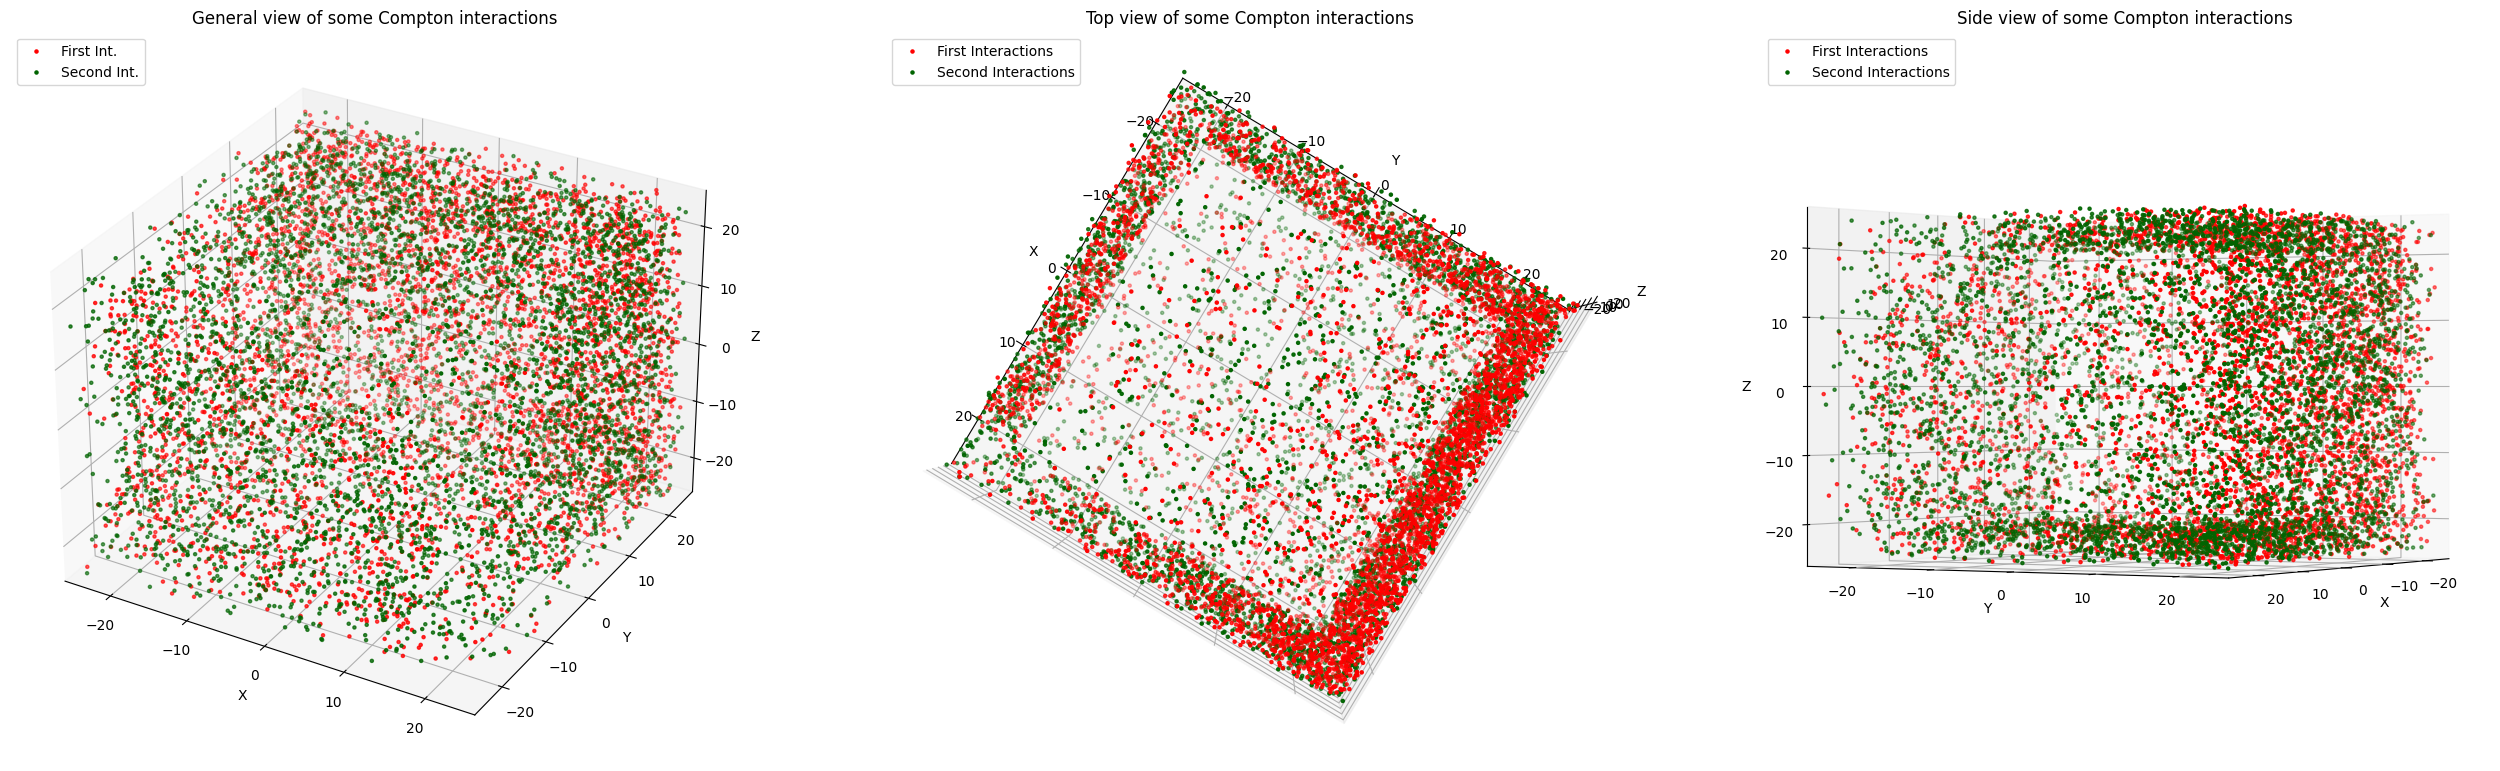

In [ ]:

numOfint1 = 5000
numOfint2 = 5000


# Create the figure with three subplots
fig = plt.figure(figsize=(32, 10))

# First subplot
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(first_int[:numOfint1,2], first_int[:numOfint1,3], first_int[:numOfint1,4], c='r', marker='.', label="First Int.")
ax1.scatter(second_int[:numOfint1,2], second_int[:numOfint1,3], second_int[:numOfint1,4], c='darkgreen', marker='.', label="Second Int.")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title("General view of some Compton interactions")
ax1.legend(loc="upper left")
ax1.set_xlim([-25, 25])
ax1.set_ylim([-25, 25])
ax1.set_zlim([-25, 25])

# Second subplot
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(first_int[:numOfint2,2], first_int[:numOfint2,3], first_int[:numOfint2,4], c='r', marker='.', label="First Interactions")
ax2.scatter(second_int[:numOfint2,2], second_int[:numOfint2,3], second_int[:numOfint2,4], c='darkgreen', marker='.', label="Second Interactions")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title("Top view of some Compton interactions")
ax2.legend(loc="upper left")
ax2.set_xlim([-25, 25])
ax2.set_ylim([-25, 25])
ax2.set_zlim([-25, 25])
ax2.view_init(elev=90, azim=30)

# Second subplot
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(first_int[:numOfint2,2], first_int[:numOfint2,3], first_int[:numOfint2,4], c='r', marker='.', label="First Interactions")
ax3.scatter(second_int[:numOfint2,2], second_int[:numOfint2,3], second_int[:numOfint2,4], c='darkgreen', marker='.', label="Second Interactions")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_title("Side view of some Compton interactions")
ax3.legend(loc="upper left")
ax3.set_xlim([-25, 25])
ax3.set_ylim([-25, 25])
ax3.set_zlim([-25, 25])
ax3.view_init(elev=0, azim=30)

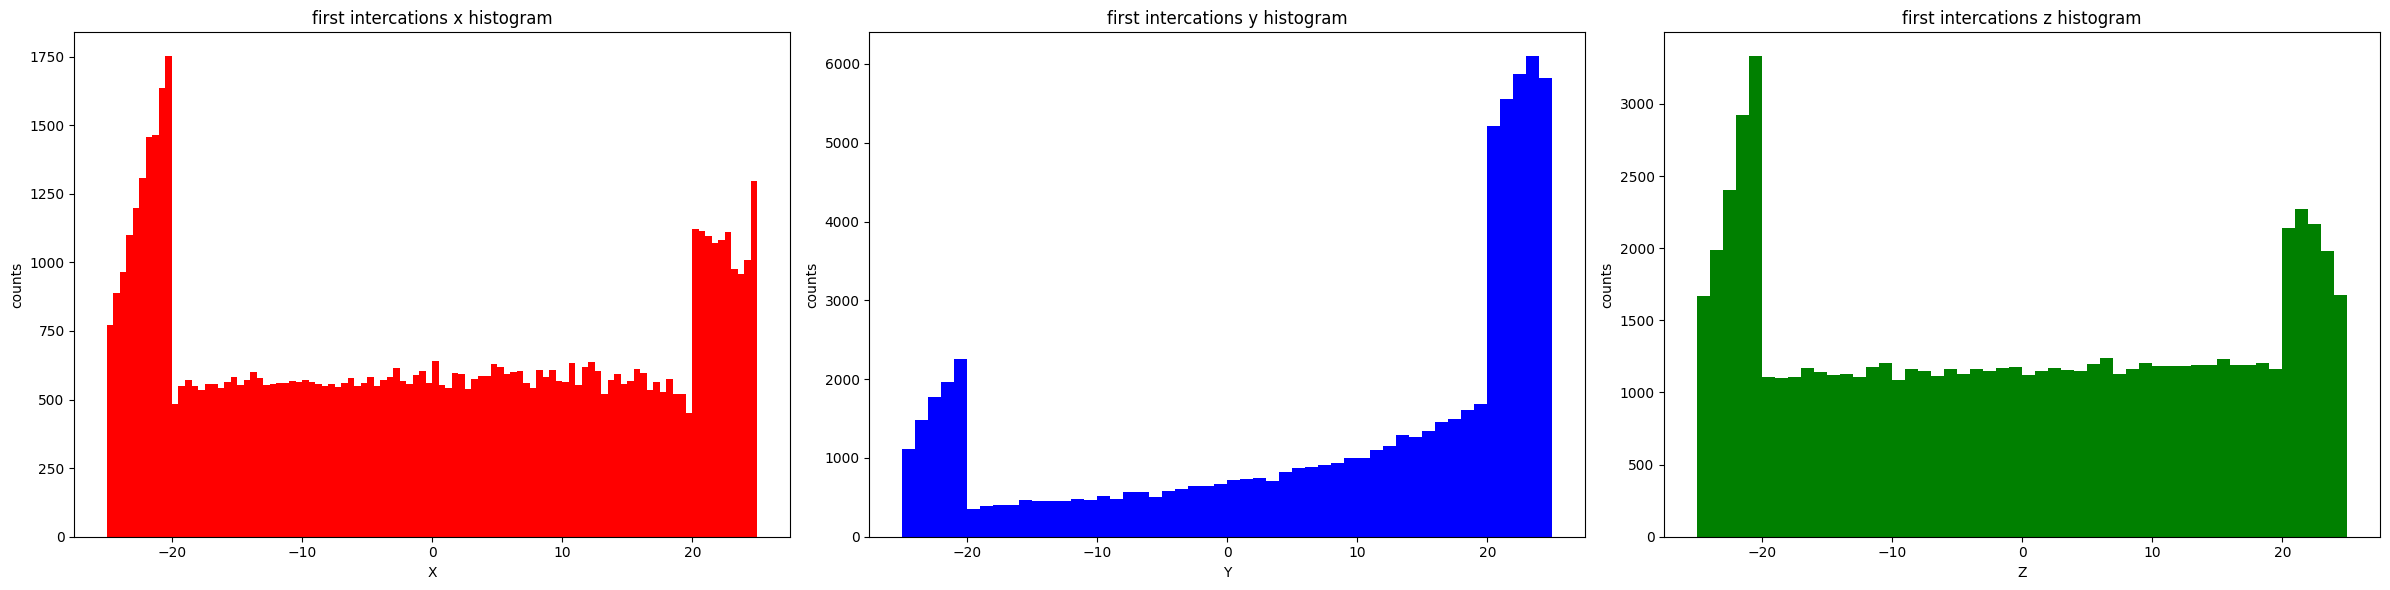

In [ ]:
# Create the histograms
fig, axs = plt.subplots(1, 3, figsize=(24, 6), tight_layout=True)
axs[0].hist(first_int[:,2], bins=100, color='r')
axs[0].set_title('Histogram of X values')
axs[0].set_xlabel('X')
axs[0].set_ylabel('counts')
axs[1].hist(first_int[:,3], bins=50, color='b')
axs[1].set_title('Histogram of Y values')
axs[1].set_xlabel('Y')
axs[1].set_ylabel('counts')
axs[2].hist(first_int[:,4], bins=50, color='g')
axs[2].set_title('Histogram of Z values')
axs[2].set_xlabel('Z')
axs[2].set_ylabel('counts')

axs[0].set_title('first intercations x histogram')
axs[1].set_title('first intercations y histogram')
axs[2].set_title('first intercations z histogram')
# Show the plots
plt.show()

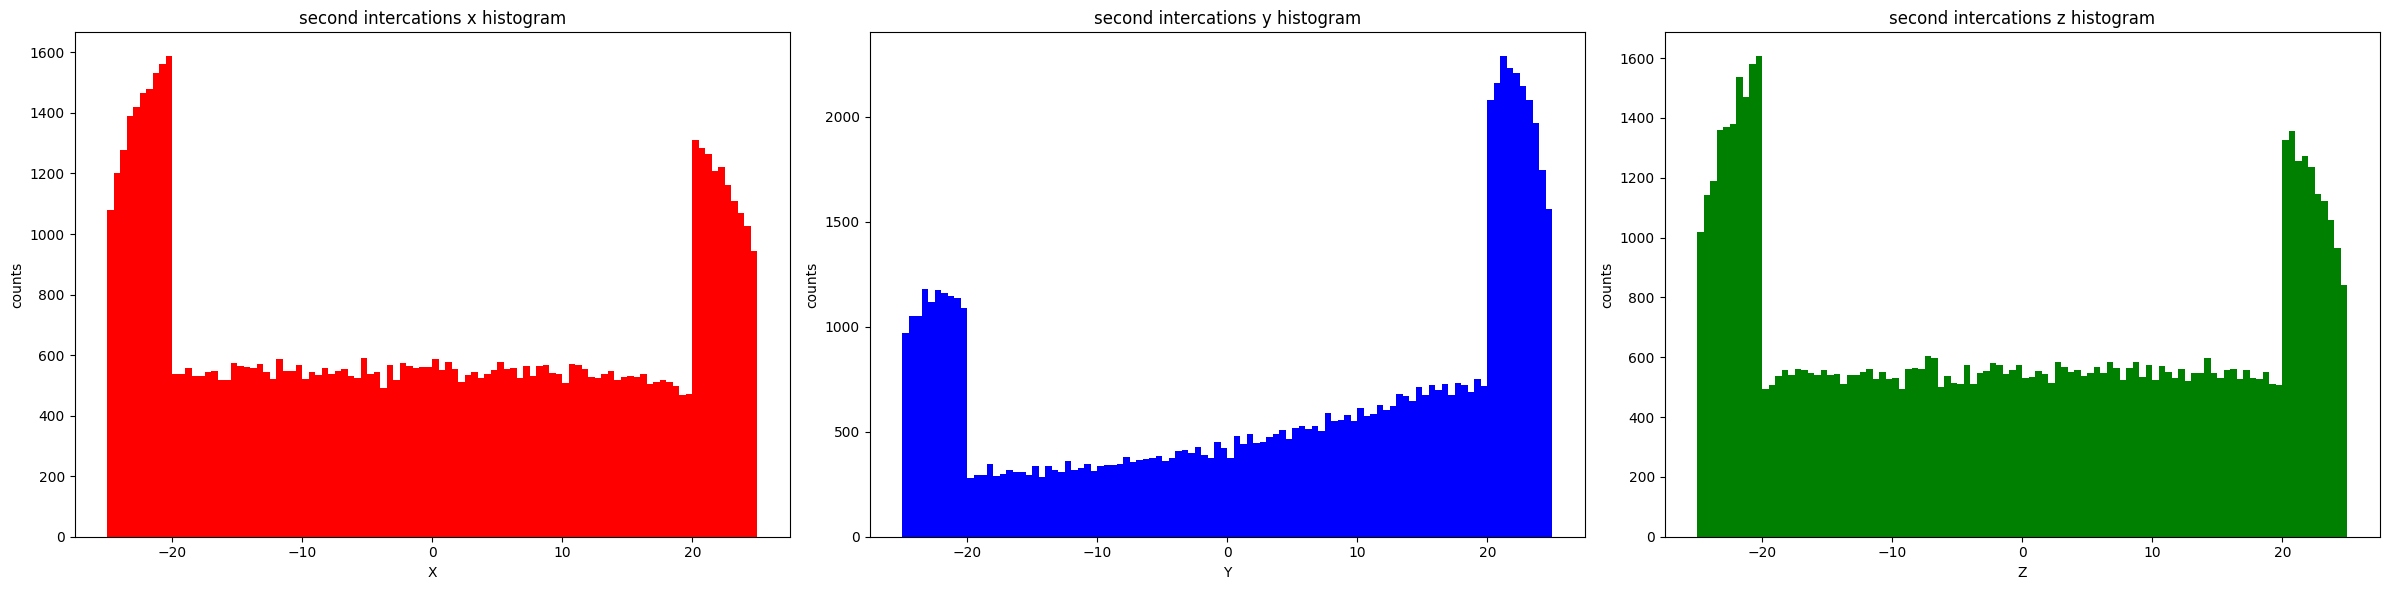

In [ ]:
# Create the histograms
fig, axs = plt.subplots(1, 3, figsize=(24, 6), tight_layout=True)
axs[0].hist(second_int[:,2], bins=100, color='r')
axs[0].set_title('Histogram of X values')
axs[0].set_xlabel('X')
axs[0].set_ylabel('counts')
axs[1].hist(second_int[:,3], bins=100, color='b')
axs[1].set_title('Histogram of Y values')
axs[1].set_xlabel('Y')
axs[1].set_ylabel('counts')
axs[2].hist(second_int[:,4], bins=100, color='g')
axs[2].set_title('Histogram of Z values')
axs[2].set_xlabel('Z')
axs[2].set_ylabel('counts')

axs[0].set_title('second intercations x histogram')
axs[1].set_title('second intercations y histogram')
axs[2].set_title('second intercations z histogram')
# Show the plots
plt.show()

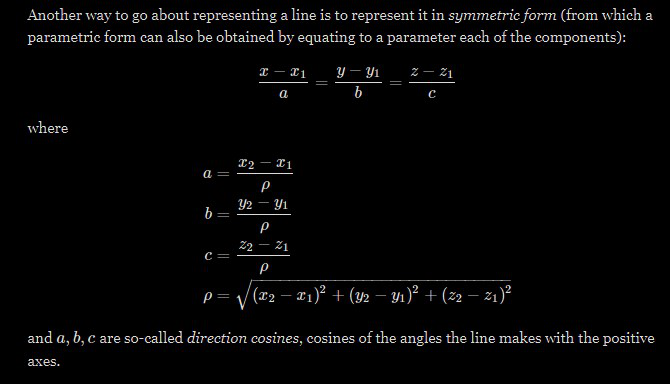

In [ ]:
from PIL import Image

img = Image.open('/content/gdrive/MyDrive/CC_Thesis/Images/howToDescribeLine.jpg')
img = np.array(img)
img = np.invert(img)
img = Image.fromarray(img)
img

make sure rho is not zero (array([], dtype=int64),)
[[-0.315 -0.315  0.098 ... -0.749  0.151  0.863]
 [ 0.089 -0.689  0.969 ...  0.606  0.131 -0.257]
 [ 0.945 -0.653  0.226 ... -0.268  0.98   0.436]]


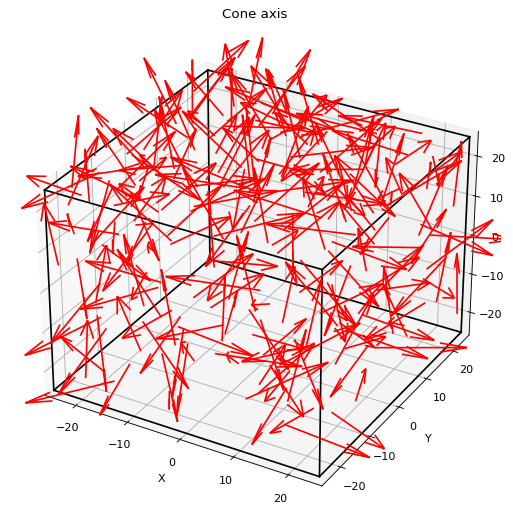

In [ ]:
rho = np.sqrt(np.sum((second_int[:,2:5]-first_int[:,2:5])**2,axis=1))
print('make sure rho is not zero',np.where(rho==0))
a_line = -(second_int[:,2]-first_int[:,2])/rho
b_line = -(second_int[:,3]-first_int[:,3])/rho
c_line = -(second_int[:,4]-first_int[:,4])/rho

    # create the 2D vector as a 1D numpy array
vec = np.array([a_line, b_line, c_line])

    # compute the norm of the vector element-wise
norms = np.linalg.norm(vec, axis=0)

    # normalize the vector element-wise by dividing it by its norm
normalized_vec = vec / norms
a_line = normalized_vec[0]
b_line = normalized_vec[1]
c_line = normalized_vec[2]
print(np.round([a_line,b_line,c_line],3))

# Create a 3D plot
fig = plt.figure(figsize=(8, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')

# Set limits for the plot
ax.set_xlim([-25, 25])
ax.set_ylim([-25, 25])
ax.set_zlim([-25, 25])
# define the cube vertices
verts = np.array([[-1, -1, -1],
                  [1, -1, -1],
                  [1, 1, -1],
                  [-1, 1, -1],
                  [-1, -1, 1],
                  [1, -1, 1],
                  [1, 1, 1],
                  [-1, 1, 1]])

# define the edges of the cube
edges = [(0, 1), (1, 2), (2, 3), (3, 0),
         (4, 5), (5, 6), (6, 7), (7, 4),
         (0, 4), (1, 5), (2, 6), (3, 7)]

# scale the vertices to fit the [-25, 25] range for each axis
scale = 25
verts *= scale

# plot the cube edges
for edge in edges:
    x = [verts[edge[0], 0], verts[edge[1], 0]]
    y = [verts[edge[0], 1], verts[edge[1], 1]]
    z = [verts[edge[0], 2], verts[edge[1], 2]]
    ax.plot(x, y, z, 'k')


# Add the three vectors to the plot
origin = np.array([0, 0, 0])
xyz = first_int[0:1,[2,3,4]].flatten()
for j in range(len(a_line)//200):
  ax.quiver(*first_int[j,[2,3,4]].flatten(), a_line[j],b_line[j],c_line[j], color='r', length=15, normalize=True)

ax.set_title('Cone axis')
# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

the edges ([x],[y],[z]) are: [-18.  18.  18. -18. -18.] [-18. -18.  18.  18. -18.] [100. 100. 100. 100. 100.]
[0 0 0]
0 0 0
[[ 22.265 -19.142  24.665]]
[[ 22.265 -19.142  24.665]]
[ 22.265 -19.142  24.665]
22.265 -19.142 24.665


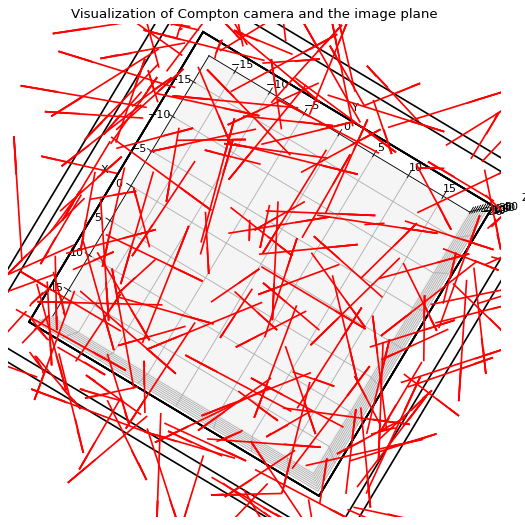

In [ ]:

###################################################################################
# define the size of the image
imgSize = 36
z_plane = 100

# create a 3D figure
fig = plt.figure(figsize=(10, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')

# define the vertices of the square in the z_plane
x = np.linspace(-imgSize/2, imgSize/2, 4)
y = np.linspace(-imgSize/2, imgSize/2, 4)
X, Y = np.meshgrid(x, y)

z = np.ones(Y.shape) * z_plane
verts = np.stack([X.flatten(), Y.flatten(), z.flatten()], axis=1)

# define the edges of the square
edges = [0,3,15, 12,0]

# plot the square edges
for edge in edges:
    ax.plot(verts[edges, 0], verts[edges, 1], verts[edges, 2], 'k')

print('the edges ([x],[y],[z]) are:',verts[edges, 0], verts[edges, 1], verts[edges, 2])
# set the axis limits and labels
# ax.set_xlim([0, 100])
# ax.set_ylim([-imgSize/2, imgSize/2])
# ax.set_zlim([-imgSize/2, imgSize/2])

# ax.set_title('Image plane and it\'s borders' )

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# show the plot
# plt.show(1)

##########################################################################
# create a 3D figure
#fig = plt.figure(1)
#ax = fig.add_subplot(111, projection='3d')

# define the cube vertices
verts = np.array([[-1, -1, -1],
                  [1, -1, -1],
                  [1, 1, -1],
                  [-1, 1, -1],
                  [-1, -1, 1],
                  [1, -1, 1],
                  [1, 1, 1],
                  [-1, 1, 1]])

# define the edges of the cube
edges = [(0, 1), (1, 2), (2, 3), (3, 0),
         (4, 5), (5, 6), (6, 7), (7, 4),
         (0, 4), (1, 5), (2, 6), (3, 7)]

# scale the vertices to fit the [-25, 25] range for each axis
scale = 25
verts *= scale

# plot the cube edges
for edge in edges:
    x = [verts[edge[0], 0], verts[edge[1], 0]]
    y = [verts[edge[0], 1], verts[edge[1], 1]]
    z = [verts[edge[0], 2], verts[edge[1], 2]]
    ax.plot(x, y, z, 'k')


# Add the three vectors to the plot
origin = np.array([0, 0, 0])
print(origin)
print(*origin)
print(first_int[0:1,[2,3,4]])
print(np.array(first_int[0:1,[2,3,4]]))
print(*np.array(first_int[0:1,[2,3,4]]))
xyz = first_int[0:1,[2,3,4]].flatten()
print(*xyz)
for j in range(len(a_line)//200):
  ax.quiver(*first_int[j,[2,3,4]].flatten(), a_line[j],b_line[j],c_line[j], color='r', length=15, normalize=True)

# set the axis limits and labels
ax.set_xlim([-imgSize/2, imgSize/2])
ax.set_ylim([-imgSize/2, imgSize/2])
ax.set_zlim([-25, 50])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Visualization of Compton camera and the image plane')
ax.view_init(elev=90, azim=30)
# show the plot
plt.show()

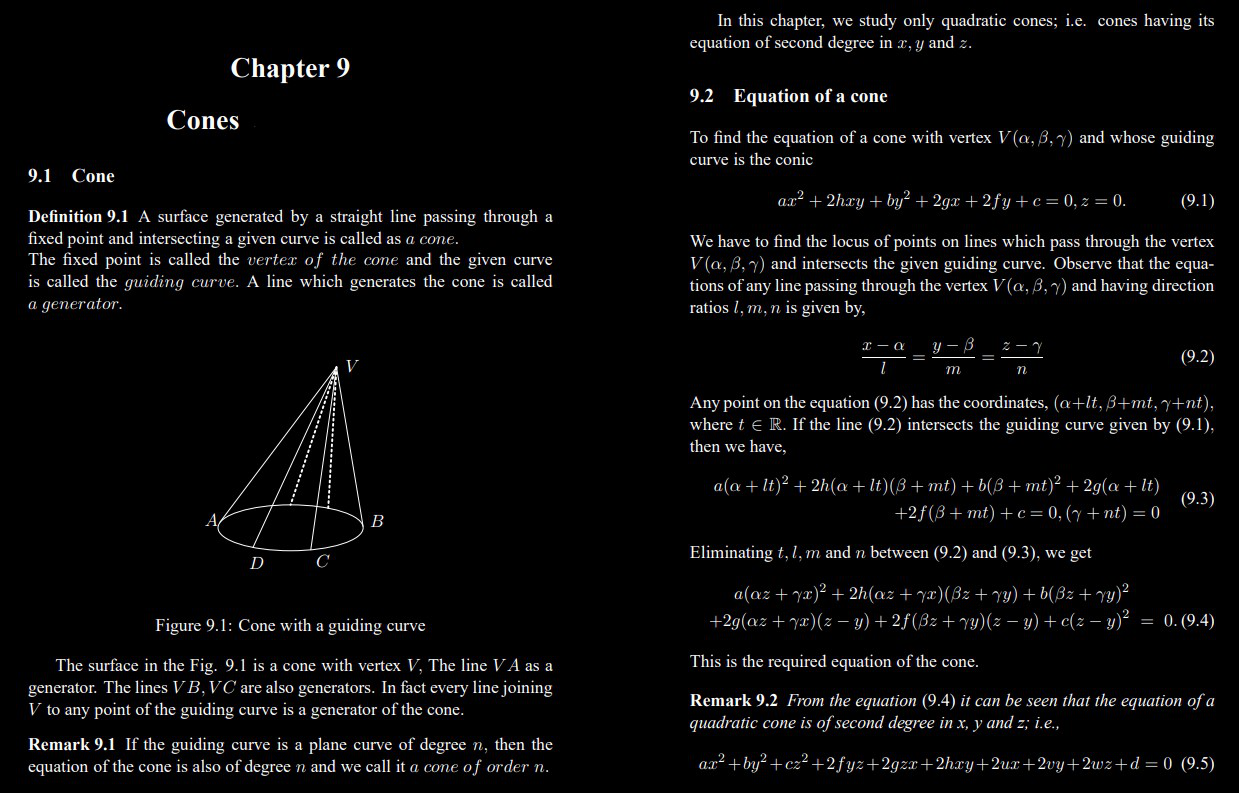

In [ ]:
img = Image.open('/content/gdrive/MyDrive/CC_Thesis/Images/GeneralConeEquation.jpg')
img = np.array(img)
img = np.invert(img)
img = Image.fromarray(img)
img

In [ ]:
# Initialize image2xyz array with zeros
image2xyz = np.zeros((imgSize**2, 3))

# Define the border limits
Yp = z_plane
Yn = -z_plane
Zp = z_plane
Zn = z_plane
Xp = z_plane
Xn = -z_plane

# Calculate the step size for each dimension
step_x = (Xp - Xn) / (imgSize)
step_y = (Yp - Yn) / (imgSize)
step_z = (Zp - Zn) / (imgSize)

# Fill the image2xyz array with pixel coordinates
for i in range(imgSize):
    for j in range(imgSize):
        # Calculate the x, y, and z coordinates of the pixel
        y = Yn + i * step_y + step_y / 2
        x = Xn + j * step_x + step_x / 2
        z = Zn + step_z / 2

        # Calculate the index of the pixel in the image2xyz array
        index = i * imgSize + j

        # Fill the corresponding row of image2xyz with the pixel coordinates
        image2xyz[index] = [x, y, z]

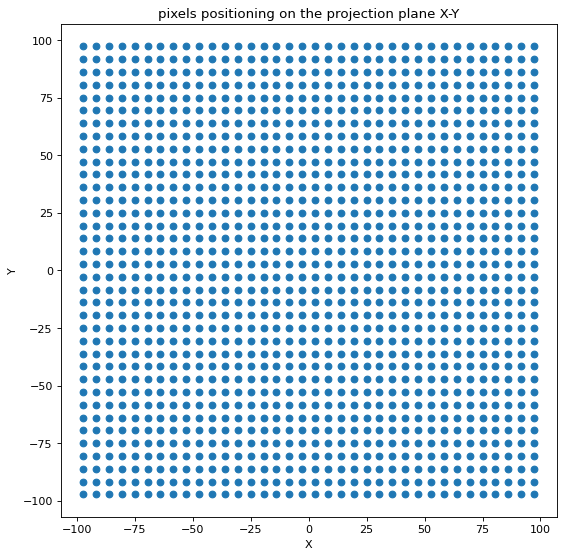

In [ ]:
# Extract the x and z coordinates from image2xyz
x = image2xyz[:, 0]
y = image2xyz[:, 1]
z = image2xyz[:, 2]

# Create a 2D scatter plot of the x-z projection of the points

fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.scatter(x, y)
ax.set_title('pixels positioning on the projection plane X-Y')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [ ]:
# Add a new column to the image2xyz array
new_column = np.random.rand(imgSize**2) / 1000.0
image2xyz = np.concatenate((image2xyz, new_column[:, None]), axis=1)

In [ ]:
# Plot X-Z plane with colors representing intensity
fig = plt.figure(figsize=(8, 6), dpi=80)
x_coords = image2xyz[:, 0]
y_coords = image2xyz[:, 1]
intensities = image2xyz[:, 3]

<Figure size 640x480 with 0 Axes>

In [ ]:
# Get the coordinates of the scattered photon, this is the vertex of the cone
x_ver = first_int[:,2]
y_ver = first_int[:,3]
z_ver = first_int[:,4]

# Get the energy of the scattered photon
E0 = 662*np.ones(first_int[:,1].shape)
E1 = first_int[:,1]
E2 = second_int[:,1]

# Get the angle of the scattered photon, Compton Angle
cosTheta = 1-511*(1./(E0-E1) - 1./(E0))

<ipython-input-55-5cbcd7b644d7>:12: RuntimeWarning: divide by zero encountered in true_divide
  cosTheta = 1-511*(1./(E0-E1) - 1./(E0))


In [ ]:
image2xyz[:, 3] = 0
a = a_line
b = b_line
c = c_line

x_v = x_ver
y_v = y_ver
z_v = z_ver
cos_t = cosTheta

x = image2xyz[:, 0]
y = image2xyz[:, 1]
z = image2xyz[:, 2]

num_of_valid_cones = 0

# Check the equation for each possible cone surface
for i in range(1,8000): #run on all cones: replace 1 with a_line.shape[0]
    #if c[i] > 0: # filter out cones that their axis is toward the second half of the word. resolution improvment is observed
    #  num_of_valid_cones += 1
      for j in range(imgSize**2): #run on all pixels replace imgSize with imgSize**2
          #equation = (a[i]*(x[j]-x_v[i])+b[i]*(y[j]-y_v[i])+c[i]*(z[j]-z_v[i]))**2 - (a[i]**2 + b[i]**2 + c[i]**2)*((x[j]-x_v[i])**2 + (y[j]-y_v[i])**2 + (z[j]-z_v[i])**2)*cos_t[i]**2  # Right angular cone
          #image2xyz[j, 3] -= equation
          if  abs(equation[i,j]) <= math.sqrt(280)*(x[5]-x[4]):
            image2xyz[j, 3] += 1;
fig = plt.figure(figsize=(16, 12), dpi=80)
intensities = image2xyz[:, 3]
#print(intensities)
print('Number of',num_of_valid_cones, 'Cones have been taken into account')
plt.scatter(x_coords, y_coords, s=320, c=intensities, cmap='inferno',marker='s')
plt.colorbar()
plt.title('SBP result on z=100 plane')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
image2xyz[:, 3] = 0
a = a_line
b = b_line
c = c_line

x_v = x_ver
y_v = y_ver
z_v = z_ver
cos_t = cosTheta

x = image2xyz[:, 0]
y = image2xyz[:, 1]
z = image2xyz[:, 2]

num_of_valid_cones = 0

# Check the equation for each possible cone surface
for i in range(10000): #run on all cones: replace 1 with a_line.shape[0]
    if c[i] > 0: # filter out cones that their axis is toward the second half of the word. resolution improvment is observed
    #  num_of_valid_cones += 1
      for j in range(imgSize**2): #run on all pixels replace imgSize with imgSize**2
          #equation = abs((a[i]*(x[j]-x_v[i])+b[i]*(y[j]-y_v[i])+c[i]*(z[j]-z_v[i]))**2 - \
          #            (a[i]**2 + b[i]**2 + c[i]**2)*((x[j]-x_v[i])**2 + (y[j]-y_v[i])**2 + (z[j]-z_v[i])**2)*abs(cos_t[i])**2)  # Right angular cone
          #image2xyz[j, 3] -= equation
          if abs(equation[i,j]) <= math.sqrt(400)*(x[2]-x[1]):
            image2xyz[j, 3] += 1;
fig = plt.figure(figsize=(16, 12), dpi=80)
intensities = image2xyz[:, 3]
#print(intensities)
print('Number of',num_of_valid_cones, 'Cones have been taken into account')
plt.scatter(x_coords, y_coords, s=320, c=intensities, cmap='inferno',marker='s')
plt.colorbar()
plt.title('SBP result on z=100 plane')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
image2xyz[:, 3] = 0

a = a_line
b = b_line
c = c_line

x_v = x_ver
y_v = y_ver
z_v = z_ver
cos_t = cosTheta

x = image2xyz[:, 0]
y = image2xyz[:, 1]
z = image2xyz[:, 2]

n_iterations = a.shape[0]
print(n_iterations)
equation = np.zeros((n_iterations,imgSize**2))

num_of_valid_cones = -1
for i in range(n_iterations):
    if c[i] > 0:
        num_of_valid_cones += 1
        for j in range(imgSize**2):
          equation[num_of_valid_cones,j] = (a[i]*(x[j]-x_v[i])+b[i]*(y[j]-y_v[i])+c[i]*(z[j]-z_v[i]))**2 - \
                    (a[i]**2 + b[i]**2 + c[i]**2)*((x[j]-x_v[i])**2 + (y[j]-y_v[i])**2 + (z[j]-z_v[i])**2)*cos_t[i]**2  # Right angular cone



68937


KeyboardInterrupt: ignored

In [ ]:
# Save the 2D array as a NumPy binary file
np.save('/content/gdrive/MyDrive/CC_Thesis/data/Data_X20_Y30_#2/equationPositiveCi', equation)

In [ ]:
equation = np.load('/content/gdrive/MyDrive/CC_Thesis/data/Data_X20_Y30_#2/v2/equationPositiveCi.npy')

In [ ]:
print(equation.shape)

(6787, 1296)


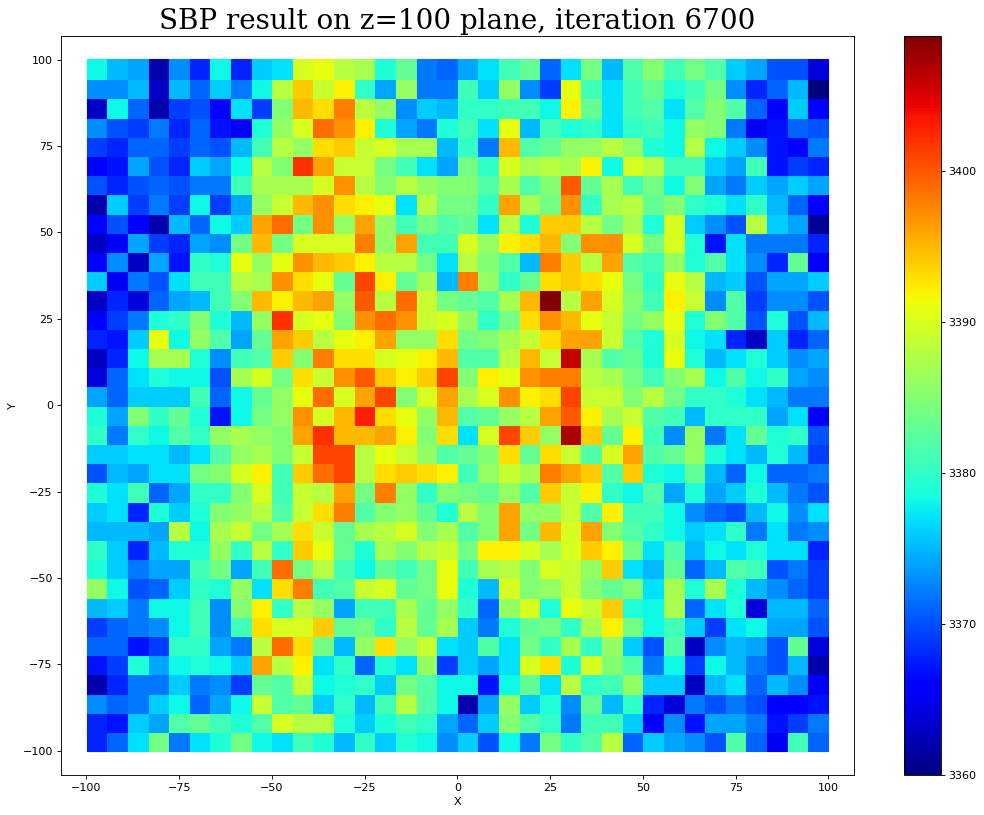

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

image2xyz[:, 3] = 0
a = a_line
b = b_line
c = c_line

x_v = x_ver
y_v = y_ver
z_v = z_ver
cos_t = cosTheta

x = image2xyz[:, 0]
y = image2xyz[:, 1]
z = image2xyz[:, 2]
initialI = 0
n_iterations = 10000
num_of_valid_cones = 0
for i in range(initialI,equation.shape[0]):
    #if c[i] > 0:
    #    num_of_valid_cones += 1
        for j in range(imgSize**2):
          #equation = abs((a[i]*(x[j]-x_v[i])+b[i]*(y[j]-y_v[i])+c[i]*(z[j]-z_v[i]))**2 - \
          #          (a[i]**2 + b[i]**2 + c[i]**2)*((x[j]-x_v[i])**2 + (y[j]-y_v[i])**2 + (z[j]-z_v[i])**2)*cos_t[i]**2)  # Right angular cone
          if abs(equation[i,j]) <= math.sqrt(150)*(x[2]-x[1]):
            image2xyz[j, 3] += 1
        intensities = image2xyz[:, 3]
        x_coords = image2xyz[:, 0]
        y_coords = image2xyz[:, 1]
        intensities = image2xyz[:, 3]
        x_coords = image2xyz[:, 0]
        y_coords = image2xyz[:, 1]
        if (i+1)%100 == 0 or (i<1001 and (i+1)%100 == 0) or i < 50 :
          fig = plt.figure(figsize=(16, 12), dpi=80)
          plt.scatter(x_coords, y_coords, s=320, c=intensities, cmap='jet', marker='s')
          plt.colorbar()
          font1 = {'family':'serif','color':'black','size':25}
          plt.title(f'SBP result on z=100 plane, iteration {i+1}', fontdict=font1)
          plt.xlabel('X')
          plt.ylabel('Y')
          plt.show(block=False)
          if i == initialI:
            plt.pause(0.1)
          clear_output(wait=True)
          plt.close(fig)


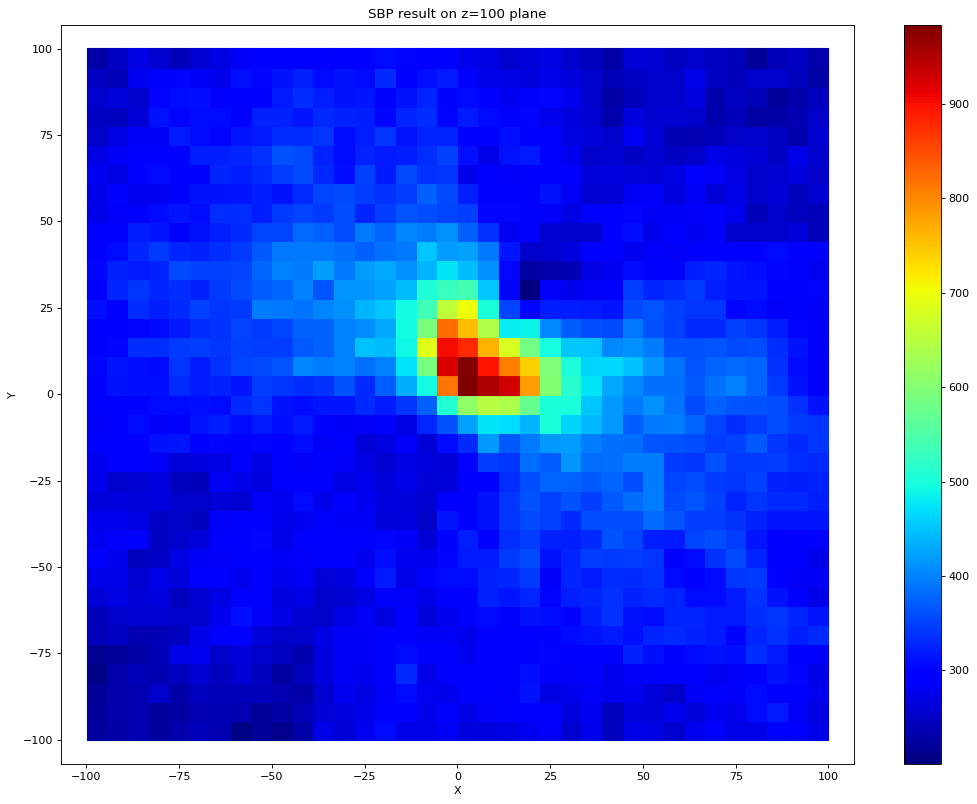

In [ ]:
def cone(a, b, c, x_v, y_v, z_v, cos_t, X, Y):
    m = (z_v**2 - (cos_t)**2)
    n = 2*(x_v*z_v*X - x_v*z_v*a - (z_v**2)*c + y_v*z_v*Y - y_v*z_v*b + c*(cos_t)**2)
    q = (z_v**2)*(c**2) + 2*x_v*z_v*c*(a-X) + 2*y_v*z_v*c*(b-Y) + (x_v**2)*((X-a)**2) + (y_v**2)*((Y-b)**2) + 2*x_v*y_v*(X-a)*(Y-b) - ((cos_t)**2)*((c**2) + (X-a)**2 + (Y-b)**2)
    Zp = (-n + np.sqrt(abs((n ** 2) - (4 * (m) * q)))) / (2 * (m))
    Zn = (-n - np.sqrt(abs((n ** 2) - (4 * (m) * q)))) / (2 * (m))
    return Zp,Zn

image2xyz[:, 3] = 0
a = a_line
b = b_line
c = c_line

x_v = x_ver
y_v = y_ver
z_v = z_ver
cos_t = cosTheta


for cone_num in range(10000):
  if c[cone_num] > 0:
    z_conep,z_conen = cone(x_v[cone_num],y_v[cone_num],z_v[cone_num],a[cone_num],b[cone_num],c[cone_num],cos_t[cone_num],image2xyz[:, 0],image2xyz[:, 1])
    # Find the indices of elements in z_cone that satisfy the condition 90 < z_cone < 110
    idx = (z_conep > 90) & (z_conep < 110) | (z_conen > 90) & (z_conen < 110)

    # Increment the fourth column of image2xyz where the condition is true
    image2xyz[idx, 3] += 1

fig = plt.figure(figsize=(16, 12), dpi=80)
intensities = image2xyz[:, 3]
#print(intensities)
x_coords = image2xyz[:, 0]
y_coords = image2xyz[:, 1]
#print('Number of',num_of_valid_cones, 'Cones have been taken into account')
plt.scatter(x_coords, y_coords, s=320, c=intensities, cmap='jet',marker='s')
plt.colorbar()
plt.title('SBP result on z=100 plane')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



Number of 10452 Cones have been taken into account


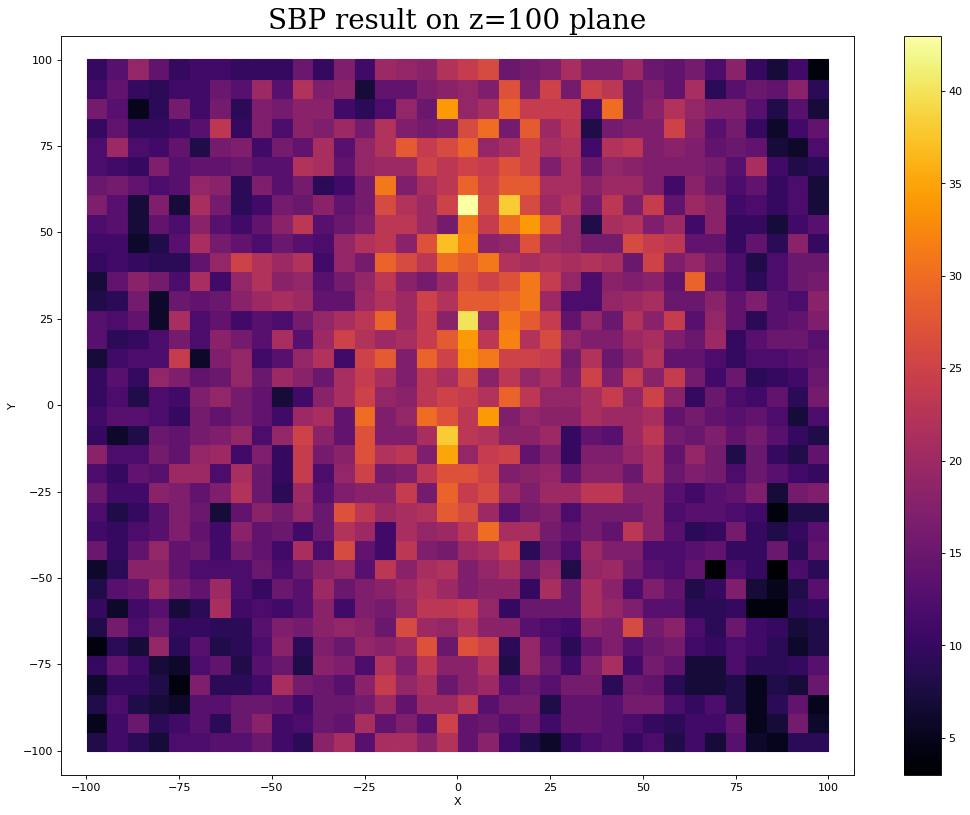

In [ ]:
image2xyz[:, 3] = 0
a = a_line
b = b_line
c = c_line

x_v = x_ver
y_v = y_ver
z_v = z_ver
cos_t = cosTheta

x = image2xyz[:, 0]
y = image2xyz[:, 1]
z = image2xyz[:, 2]

num_of_valid_cones = 0

# Check the equation for each possible cone surface
for i in range(20000): #run on all cones: replace 1 with a_line.shape[0]
    if c[i] > 0: # filter out cones that their axis is toward the second half of the word. resolution improvment is observed
      num_of_valid_cones += 1
      for j in range(imgSize**2): #run on all pixels replace imgSize with imgSize**2
          equation = abs((a[i]*(x[j]-x_v[i])+b[i]*(y[j]-y_v[i])+c[i]*(z[j]-z_v[i]))**2 - \
                      (a[i]**2 + b[i]**2 + c[i]**2)*((x[j]-x_v[i])**2 + (y[j]-y_v[i])**2 + (z[j]-z_v[i])**2)*cos_t[i]**2)  # Right angular cone
          #image2xyz[j, 3] -= equation
          if equation <= math.sqrt(2)*(x[2]-x[1]):
            image2xyz[j, 3] += 1;
fig = plt.figure(figsize=(16, 12), dpi=80)
intensities = image2xyz[:, 3]
#print(intensities)
print('Number of',num_of_valid_cones, 'Cones have been taken into account')
plt.scatter(x_coords, y_coords, s=320, c=intensities, cmap='inferno',marker='s')
plt.colorbar()
font1 = {'family':'serif','color':'black','size':25}
plt.title('SBP result on z=100 plane', fontdict = font1)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
image2xyz[:, 3] = 0
a = a_line
b = b_line
c = c_line

x_v = x_ver
y_v = y_ver
z_v = z_ver
cos_t = cosTheta

x = image2xyz[:, 0]
y = image2xyz[:, 1]
z = image2xyz[:, 2]

num_of_valid_cones = 0

# Check the equation for each possible cone surface
for i in range(20000): #run on all cones: replace 1 with a_line.shape[0]
    #if c[i] > 0: # filter out cones that their axis is toward the second half of the word. resolution improvment is observed
      num_of_valid_cones += 1
      for j in range(imgSize**2): #run on all pixels replace imgSize with imgSize**2
          equation = abs((a[i]*(x[j]-x_v[i])+b[i]*(y[j]-y_v[i])+c[i]*(z[j]-z_v[i]))**2 - \
                      (a[i]**2 + b[i]**2 + c[i]**2)*((x[j]-x_v[i])**2 + (y[j]-y_v[i])**2 + (z[j]-z_v[i])**2)*cos_t[i]**2)  # Right angular cone
          #image2xyz[j, 3] -= equation
          if equation <= math.sqrt(2)*(x[2]-x[1]):
            image2xyz[j, 3] += 1;
fig = plt.figure(figsize=(16, 12), dpi=80)
intensities = image2xyz[:, 3]
#print(intensities)
print('Number of',num_of_valid_cones, 'Cones have been taken into account')
plt.scatter(x_coords, y_coords, s=320, c=intensities, cmap='inferno',marker='s')
plt.colorbar()
font1 = {'family':'serif','color':'black','size':25}
plt.title('SBP result on z=100 plane', fontdict = font1)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# Find the spatial resolution in terms of FWHM (Full Width Half Minimum)

#find the peak x,y position
x_peak = image2xyz[np.where(intensities==max(intensities))[0],0]
y_peak = image2xyz[np.where(intensities==max(intensities))[0],1]
z_peak = image2xyz[np.where(intensities==max(intensities))[0],2]

# Find the minimum intensity and its index
min_intensity = np.min(intensities)
min_index = np.argmin(intensities)

# Find the half minimum intensity value
half_min_intensity = min_intensity / 2

# Find the indices of the intensity values that are closest to the half minimum intensity value
indices = np.abs(intensities - half_min_intensity).argsort()[:2]

x_hm = image2xyz[indices[0],0]
y_hm = image2xyz[indices[0],1]

# Calculate the FWHM as the distance between the two closest indices
fwhm = math.sqrt((x_hm - x_peak)**2 + (y_hm - y_peak)**2)

# Calculate the map resolution as the FWHM multiplied by the pixel size
pixel_size = 1  # Replace with the pixel size of your map
resolution = fwhm * pixel_size

print(f"The map resolution is {resolution}.")

The map resolution is 42.309850588132825.


In [ ]:
# This modified code calculates the FWHM based on the full width at half maximum value and prints out the map resolution in terms of pixel size.
# Find the peak x,y position
x_peak = image2xyz[np.where(intensities==max(intensities))[0],0]
y_peak = image2xyz[np.where(intensities==max(intensities))[0],1]
z_peak = image2xyz[np.where(intensities==max(intensities))[0],2]

# Find the half maximum intensity value
half_max_intensity = (max(intensities) + min(intensities)) / 2

# Find the indices of the intensity values that are closest to the half maximum intensity value
indices = np.abs(intensities - half_max_intensity).argsort()[:2]

x_hm1 = image2xyz[indices[0],0]
y_hm1 = image2xyz[indices[0],1]

x_hm2 = image2xyz[indices[1],0]
y_hm2 = image2xyz[indices[1],1]

# Calculate the FWHM as the distance between the two closest indices
fwhm = math.sqrt((x_hm2 - x_hm1)**2 + (y_hm2 - y_hm1)**2)

# Calculate the map resolution as the FWHM multiplied by the pixel size
pixel_size = 1  # Replace with the pixel size of your map
resolution = fwhm * pixel_size
print(f"The peak is at {x_peak[0],y_peak[0]}.")
print(f"The map resolution is {resolution}.")



The peak is at (8.333333333333336, 13.888888888888893).
The map resolution is 43.390275977259186.


to do list


*   everything to "def functions", main function of "SBP apply"
*   voxelization
*   Rotataion of the intersection plane! instead of (x,y,z) in the equaion of the cone surface, rotate it to const*(x-a,y-b,z-c)
*   LETAED results



